# Repaso de Estadística

- Mejor Predictor Lineal

- Overfitting

## Problema del Mejor Predictor Lineal

Dejaremos de lado temporalmente las pruebas de significancia, los intervalos de confianza y, en general, de la inferencia estadística de parámetros poblacionales por medio de muestras. Posteriormente en el curso, estos temas será reintroducidos para poder unir al mundo de la estadística y la econometría tradicionales con el aprendizaje automático.

Nuestro fin es tener un predictor de la variable aleatoria $Y$, utilizando el vector de $p$ variables $X=(X_1,...X_p)$; asumimos que el primer término es constante, es decir $X_1=1$. Esto quiere decir que queremos construir una función $f$ que mapee al espacio de $X$ al espacio de $Y$. Y especialmente deseamos una función que minimice la diferencia esperada entre $f(X)$ y $Y$. Esto quiere decir que podemos plantear el problema

\begin{align}
\min_fE[d(f(X), Y)]\text{,}
\end{align}

donde $d$ es una métrica de distancia.

Por el momento, plantearemos la forma más simple de este problema, que asume

1. La función $d=d_2^2$ que utilizaremos es el cuadrado la distancia euclidiana, es decir

\begin{align}
d_2^2(f(X),Y)=(Y-f(X))^2\text{,}
\end{align}

y

2. La función $f$ es una combinación lineal de $X$, es decir

\begin{align}
f(X)=\sum_{i=1}^p\beta_iX_i=X\beta\text{,}
\end{align}

donde $\beta$ son llamados los coeficientes de regresión.

Estos supuestos facilitan hallar una solución cerrada del problema de predición, pues ahora tenemos

\begin{align}
\min_{\beta}E[(Y-X\beta)^2]
\end{align}

con condición de primer orden

\begin{align}
E[(Y-X\beta)X]=0\text{.}
\end{align}

Esta última ecuación es conocida como la ecuación normal. Podemos reescribirla como

\begin{gather}
E[X\varepsilon]=0\\
\varepsilon=Y-X\beta\text{.}
\end{gather}

Por la ley de expectativas iteradas, tenemos que la ecuación normal implica también que

\begin{gather}
E[(E[Y|X]-X\beta)X]=0\text{.}
\end{gather}

Esto implica que nuestro predictor lineal $\hat{f}$ no solamente es el mejor predictor lineal de $Y$, sino también el mejor predictor lineal de $E[Y|X]$. Este resultado es de gran importancia pues nos permite pasar a hablar de *mejores predictores*. Dada una colección de regresores $W$ "en crudo", podemos definir a $X=T(W)=(T_1(W),...,T_p(W))$ como transformaciones de $W$. La utilización de transformaciones es motivada por la posibilidad de que la relación $E[Y|W]=m(W)$ entre $W$ y $Y$ sea *no lineal*, pues las transformaciones nos brindan mayor flexibilidad a pesar de que nuestra herramienta es una combinación lineal.

Por ejemplo, podemos generar la relación

\begin{gather}
E[Y|W]=e^{4W}
\end{gather}

y hallar una combinación lineal de transformaciones de $W$ que aproxime a $E[Y|W]$



In [ ]:
import numpy as np

W = np.random.uniform(0, 1, 1000)
Y = np.exp(4 * W) + np.random.normal(0, 1, 1000)
sorted_indices = np.argsort(W)

Empezamos con un polinomio de grado 1 ($p=2$)

In [ ]:
from sklearn.linear_model import LinearRegression

W_poly1 = np.array([W ** i for i in range(2)]).T
poly1_model = LinearRegression()
poly1_model.fit(W_poly1, Y)

LinearRegression()

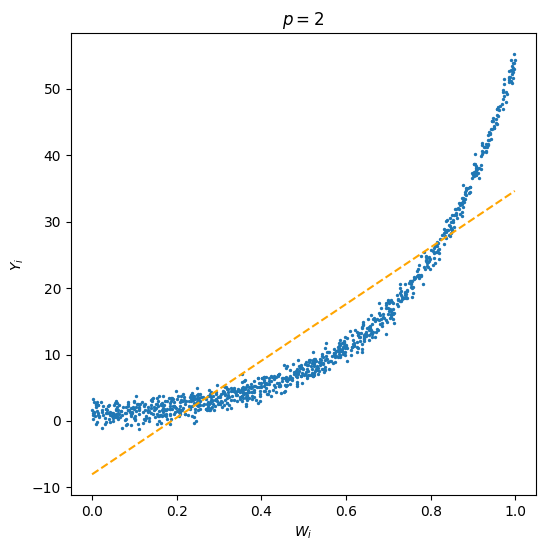

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (6, 6))
ax.scatter(W, Y, s = 2)
ax.plot(W[sorted_indices], poly1_model.predict(W_poly1[sorted_indices]), c = "orange", ls = "--")
ax.set_xlabel("$W_i$")
ax.set_ylabel("$Y_i$")
ax.set_title("$p=2$")
plt.show()

Ahora un polinomio de grado 2 ($p=3$)

In [ ]:
W_poly2 = np.array([W ** i for i in range(3)]).T
poly2_model = LinearRegression()
poly2_model.fit(W_poly2, Y)

LinearRegression()

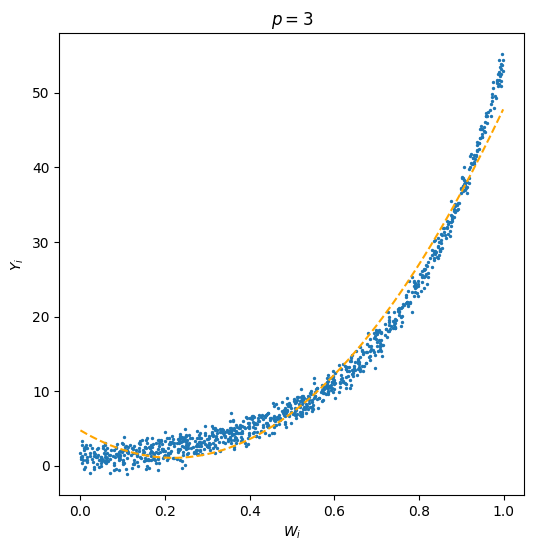

In [ ]:
fig, ax = plt.subplots(figsize = (6, 6))
ax.scatter(W, Y, s = 2)
ax.plot(W[sorted_indices], poly2_model.predict(W_poly2[sorted_indices]), c = "orange", ls = "--")
ax.set_xlabel("$W_i$")
ax.set_ylabel("$Y_i$")
ax.set_title("$p=3$")
plt.show()

In [ ]:
W_poly3 = np.array([W ** i for i in range(4)]).T
poly3_model = LinearRegression()
poly3_model.fit(W_poly3, Y)

LinearRegression()

Ahora $p=4$

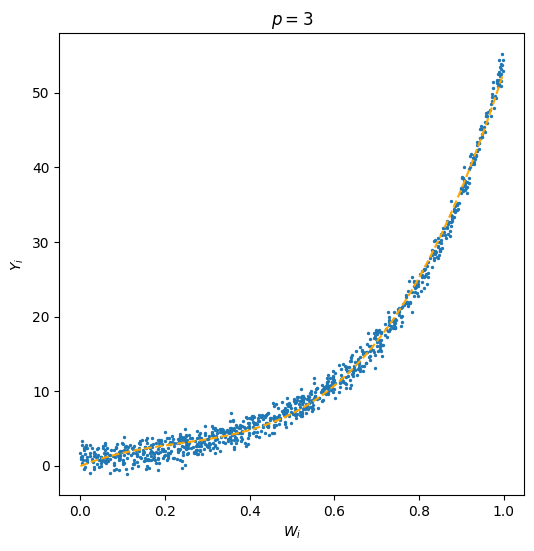

In [ ]:
fig, ax = plt.subplots(figsize = (6, 6))
ax.scatter(W, Y, s = 2)
ax.plot(W[sorted_indices], poly3_model.predict(W_poly3[sorted_indices]), c = "orange", ls = "--")
ax.set_xlabel("$W_i$")
ax.set_ylabel("$Y_i$")
ax.set_title("$p=3$")
plt.show()

Utilizando al mejor predictor lineal $X\beta$, estamos aproximando implícitamente al mejor predictor, es decir, a $E[Y|W]$. Esto lo podemos verificar viendo que para todo $\beta$

\begin{gather}
E[(Y-T(W)\beta)^2]=E[(E[Y|W]-T(W)\beta)^2]+E[(Y-E[Y|W])^2]\text{.}
\end{gather}

El primer término del lado derecho es el error de predicción de $T(W)\beta$ para $E[Y|W]$, y el segundo término es una constante que no depende de $\beta$.

Sin embargo, es necesario tomar en cuenta que en todos estos casos $p/n$ es un número pequeño. Conforme $p/n$ crece, podemos tener rendimientos espúreos, ya que lo que deseamos en el aprendizaje automático es generalizar nuestros modelos de predicción fuera de la muestra de entrenamiento. En este caso, sí podemos hacer esta generalización con un nuevo conjunto de observaciones.

In [ ]:
W_test = np.random.uniform(0, 1, 100)
Y_test = np.exp(4*W_test) + np.random.normal(0, 1, 100)
test_sorted_indices = np.argsort(W_test)
W_poly3_test = np.array([W_test ** i for i in range(4)]).T

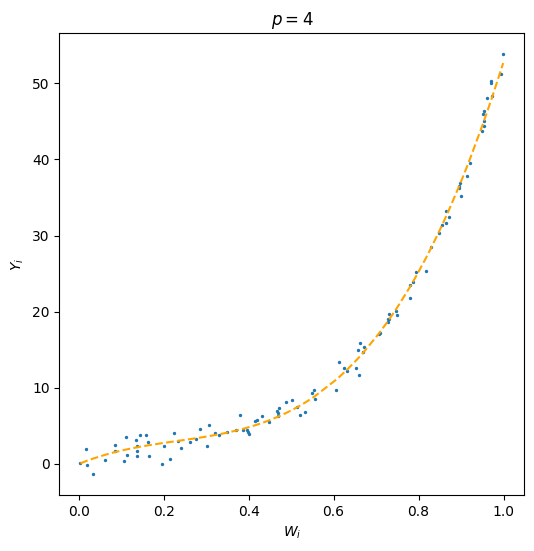

In [ ]:
fig, ax = plt.subplots(figsize = (6, 6))
ax.scatter(W_test, Y_test, s = 2)
ax.plot(W_test[test_sorted_indices], poly3_model.predict(W_poly3_test[test_sorted_indices]), c = "orange", ls = "--")
ax.set_xlabel("$W_i$")
ax.set_ylabel("$Y_i$")
ax.set_title("$p=4$")
plt.show()

Podemos también utilizar métricas como el error cuadrático medio (MSE)

\begin{align}
MSE=\frac{1}{n}\sum^{n}_{i=1}(Y^{(i)}-X^{(i)}\beta)^2
\end{align}

para nuestras observaciones iniciales (de entrenamiento) y la nueva muestra (de prueba)

In [ ]:
train_mse = ((Y - poly3_model.predict(W_poly3)) ** 2).mean()
test_mse = ((Y_test - poly3_model.predict(W_poly3_test)) ** 2).mean()

print("Error de entrenamiento: %.4f" % train_mse)
print("Error de prueba: %.4f" % test_mse)

Error de entrenamiento: 1.2392
Error de prueba: 1.1196


En un caso con un ratio $p/n$ alto, podemos tener relaciones espúreas que llevan a un buen rendimiento con las observaciones iniciales. Es más, las variables objetivo pueden ser totalmente independientes de las variables de predicción, y aún así tendríamos un alto rendimiento durante el entrenamiento. El problema se hará claro a la hora de generalizar.

In [ ]:
X = np.random.normal(0, 1, (1000, 1000))
Y = np.random.normal(0, 1, 1000)
linear_model = LinearRegression()
linear_model.fit(X, Y)
train_mse = ((Y - linear_model.predict(X)) ** 2).mean()
print("Error de entrenamiento: %.4f" % train_mse)

Error de entrenamiento: 0.0000


In [ ]:
X_test = np.random.normal(0, 1, (100, 1000))
Y_test = np.random.normal(0, 1, 100)
test_mse = ((Y_test - linear_model.predict(X_test)) ** 2).mean()
print("Error de entrenamiento: %.4f" % test_mse)

Error de entrenamiento: 5180.7570
